In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import custom_funcs as cf
from datetime import datetime

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#G = cf.load_seventh_grader_network()
#H = nx.read_gpickle('Synthetic Social Network.pkl')
G = nx.gnp_random_graph(100 , 0.05, seed=5001)
G = G.to_directed()

In [3]:
#G.nodes(data=True)

In [4]:
print(len(G.nodes()))

100


In [5]:
#G.edges(data=True)

In [9]:
#G.node[1]

In [10]:
#G.node[21]

In [11]:
#for n in G.nodes():
#    del G.node[n]

In [12]:
#G.nodes(data=True)

In [13]:
#G.node[21]['sex']

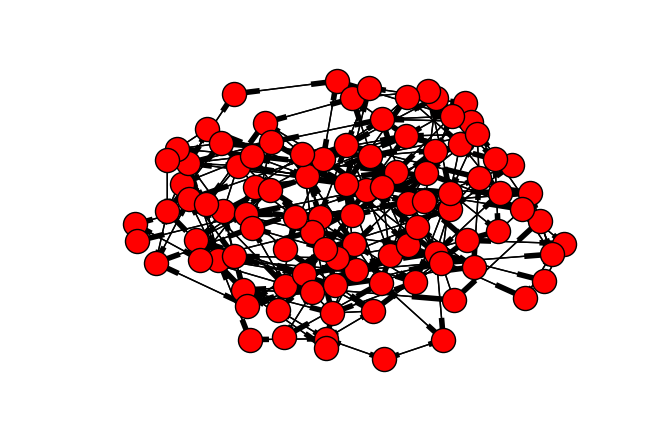

In [14]:
nx.draw(G)

In [15]:
#del G.node[21]['gender']

In [16]:
#G.edges()

In [17]:
#G = G.to_directed()

In [18]:
#nx.draw(G)

In [19]:
#G.edges()

In [20]:
for n in G.nodes():
    #del G.node[n]['gender']
    print(G.node.items())

dict_items([(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {}), (10, {}), (11, {}), (12, {}), (13, {}), (14, {}), (15, {}), (16, {}), (17, {}), (18, {}), (19, {}), (20, {}), (21, {}), (22, {}), (23, {}), (24, {}), (25, {}), (26, {}), (27, {}), (28, {}), (29, {}), (30, {}), (31, {}), (32, {}), (33, {}), (34, {}), (35, {}), (36, {}), (37, {}), (38, {}), (39, {}), (40, {}), (41, {}), (42, {}), (43, {}), (44, {}), (45, {}), (46, {}), (47, {}), (48, {}), (49, {}), (50, {}), (51, {}), (52, {}), (53, {}), (54, {}), (55, {}), (56, {}), (57, {}), (58, {}), (59, {}), (60, {}), (61, {}), (62, {}), (63, {}), (64, {}), (65, {}), (66, {}), (67, {}), (68, {}), (69, {}), (70, {}), (71, {}), (72, {}), (73, {}), (74, {}), (75, {}), (76, {}), (77, {}), (78, {}), (79, {}), (80, {}), (81, {}), (82, {}), (83, {}), (84, {}), (85, {}), (86, {}), (87, {}), (88, {}), (89, {}), (90, {}), (91, {}), (92, {}), (93, {}), (94, {}), (95, {}), (96, {}), (97, {}), (98, {}), (99, {})

In [21]:
#G.nodes(data=True)

In [22]:
import decimal
import random
random.seed(9001)
for n in G.nodes():
    temp = round(random.uniform(0, 1), 3)
    G.add_node(n,ViRt=temp)

In [23]:
#G.nodes(data=True)

In [24]:
#for n in G.nodes():
#    del G.node[n]['gender']

In [25]:
#G.nodes(data=True)

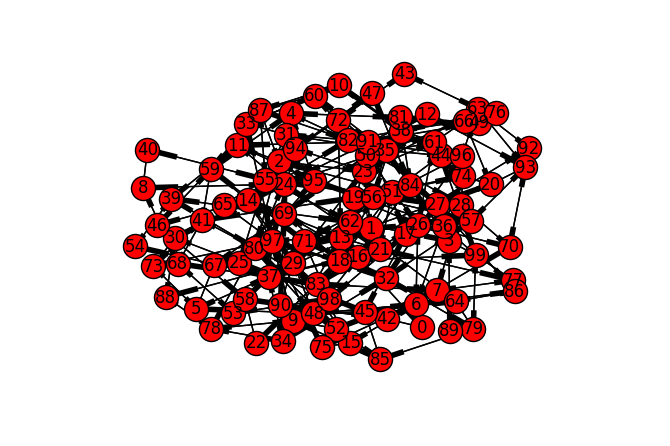

In [26]:
nx.draw(G, with_labels=True)

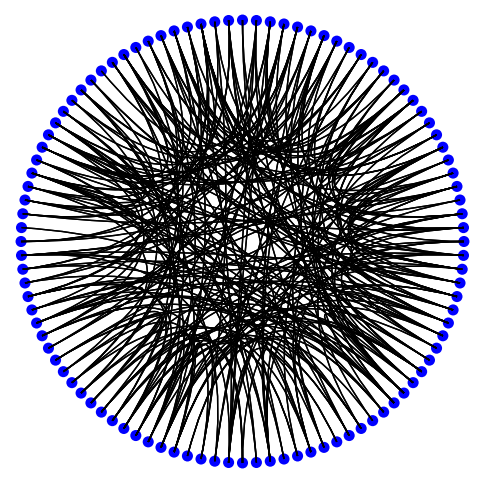

In [27]:
from circos import CircosPlot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

nodes = sorted(G.nodes())
edges = G.edges()
#node_cmap = {'Male':'blue', 'Female':'red'}
#nodecolors = [node_cmap[G.node[n]['sex']] for n in G.nodes()]

c = CircosPlot(nodes, edges, radius=10, ax=ax, fig=fig)
c.draw()  
plt.savefig('images/paper.jpg', dpi=300)

In [28]:
for n in G.nodes():
    frnds = len(G.neighbors(n))
    G.add_node(n,friends=frnds)

In [29]:
#G.nodes(data=True)

In [30]:
from random import randint
random.seed(9002)
for n in G.nodes():
    temp = randint(0,100)
    G.add_node(n,uploads=temp)

In [31]:
G.nodes(data=True)

[(0, {'ViRt': 0.037, 'friends': 2, 'uploads': 35}),
 (1, {'ViRt': 0.253, 'friends': 5, 'uploads': 82}),
 (2, {'ViRt': 0.564, 'friends': 6, 'uploads': 44}),
 (3, {'ViRt': 0.569, 'friends': 6, 'uploads': 80}),
 (4, {'ViRt': 0.606, 'friends': 5, 'uploads': 18}),
 (5, {'ViRt': 0.513, 'friends': 4, 'uploads': 48}),
 (6, {'ViRt': 0.713, 'friends': 7, 'uploads': 43}),
 (7, {'ViRt': 0.893, 'friends': 5, 'uploads': 93}),
 (8, {'ViRt': 0.616, 'friends': 3, 'uploads': 74}),
 (9, {'ViRt': 0.538, 'friends': 5, 'uploads': 72}),
 (10, {'ViRt': 0.759, 'friends': 4, 'uploads': 31}),
 (11, {'ViRt': 0.981, 'friends': 5, 'uploads': 8}),
 (12, {'ViRt': 0.291, 'friends': 3, 'uploads': 61}),
 (13, {'ViRt': 0.589, 'friends': 9, 'uploads': 4}),
 (14, {'ViRt': 0.074, 'friends': 8, 'uploads': 91}),
 (15, {'ViRt': 0.444, 'friends': 4, 'uploads': 4}),
 (16, {'ViRt': 0.769, 'friends': 4, 'uploads': 6}),
 (17, {'ViRt': 0.609, 'friends': 4, 'uploads': 93}),
 (18, {'ViRt': 0.739, 'friends': 8, 'uploads': 60}),
 (19, {

In [32]:
G.node[21]['friends']

6

In [33]:
G.node[21]['ViRt']

0.247

In [34]:
maxi_friends = 0
maxi_uploads = 0
for n in G.nodes():
    maxi_friends = max(maxi_friends, G.node[n]['friends'])
    maxi_uploads = max(maxi_uploads, G.node[n]['uploads'])

print(maxi_friends)
print(maxi_uploads)

12
99


In [35]:
import math
log_maxi_friends = math.log10(maxi_friends)
#log_maxi_friends = "%.3f" % log_maxi_friends
print(log_maxi_friends)
log_maxi_uploads = math.log10(maxi_uploads)
#log_maxi_uploads = "%.3f" % log_maxi_uploads
print(log_maxi_uploads)

1.0791812460476249
1.99563519459755


In [36]:
AttrCoeff = 0.0
for n in G.nodes():
    log_uploads = math.log10(1 + G.node[n]['uploads'])
    log_friends = math.log10(1 + G.node[n]['friends'])
    bias = math.log10(2)
    AttrCoeff = ((log_uploads + log_friends)/(log_maxi_uploads + log_maxi_friends + bias))
    AttrCoeff = round(AttrCoeff, 3)
    G.add_node(n,Attractiveness_Coeff=AttrCoeff)

In [37]:
G.nodes(data=True)

[(0,
  {'Attractiveness_Coeff': 0.602, 'ViRt': 0.037, 'friends': 2, 'uploads': 35}),
 (1,
  {'Attractiveness_Coeff': 0.799, 'ViRt': 0.253, 'friends': 5, 'uploads': 82}),
 (2,
  {'Attractiveness_Coeff': 0.74, 'ViRt': 0.564, 'friends': 6, 'uploads': 44}),
 (3,
  {'Attractiveness_Coeff': 0.816, 'ViRt': 0.569, 'friends': 6, 'uploads': 80}),
 (4,
  {'Attractiveness_Coeff': 0.609, 'ViRt': 0.606, 'friends': 5, 'uploads': 18}),
 (5,
  {'Attractiveness_Coeff': 0.708, 'ViRt': 0.513, 'friends': 4, 'uploads': 48}),
 (6,
  {'Attractiveness_Coeff': 0.754, 'ViRt': 0.713, 'friends': 7, 'uploads': 43}),
 (7,
  {'Attractiveness_Coeff': 0.815, 'ViRt': 0.893, 'friends': 5, 'uploads': 93}),
 (8,
  {'Attractiveness_Coeff': 0.734, 'ViRt': 0.616, 'friends': 3, 'uploads': 74}),
 (9,
  {'Attractiveness_Coeff': 0.782, 'ViRt': 0.538, 'friends': 5, 'uploads': 72}),
 (10,
  {'Attractiveness_Coeff': 0.653, 'ViRt': 0.759, 'friends': 4, 'uploads': 31}),
 (11,
  {'Attractiveness_Coeff': 0.513, 'ViRt': 0.981, 'friends':

In [38]:
G.edges(data=True)

[(0, 42, {}),
 (0, 13, {}),
 (1, 23, {}),
 (1, 57, {}),
 (1, 51, {}),
 (1, 37, {}),
 (1, 71, {}),
 (2, 80, {}),
 (2, 51, {}),
 (2, 87, {}),
 (2, 23, {}),
 (2, 11, {}),
 (2, 31, {}),
 (3, 99, {}),
 (3, 35, {}),
 (3, 84, {}),
 (3, 89, {}),
 (3, 57, {}),
 (3, 62, {}),
 (4, 31, {}),
 (4, 81, {}),
 (4, 82, {}),
 (4, 59, {}),
 (4, 95, {}),
 (5, 48, {}),
 (5, 73, {}),
 (5, 67, {}),
 (5, 37, {}),
 (6, 48, {}),
 (6, 36, {}),
 (6, 86, {}),
 (6, 7, {}),
 (6, 26, {}),
 (6, 75, {}),
 (6, 15, {}),
 (7, 28, {}),
 (7, 83, {}),
 (7, 52, {}),
 (7, 77, {}),
 (7, 6, {}),
 (8, 24, {}),
 (8, 40, {}),
 (8, 68, {}),
 (9, 97, {}),
 (9, 52, {}),
 (9, 13, {}),
 (9, 78, {}),
 (9, 85, {}),
 (10, 33, {}),
 (10, 44, {}),
 (10, 38, {}),
 (10, 87, {}),
 (11, 24, {}),
 (11, 39, {}),
 (11, 2, {}),
 (11, 91, {}),
 (11, 95, {}),
 (12, 24, {}),
 (12, 93, {}),
 (12, 38, {}),
 (13, 0, {}),
 (13, 16, {}),
 (13, 67, {}),
 (13, 20, {}),
 (13, 21, {}),
 (13, 97, {}),
 (13, 72, {}),
 (13, 9, {}),
 (13, 14, {}),
 (14, 97, {}),
 (1

In [39]:
#for v1,v2,a in G.edges(data=True):
#    G[v1][v2]['count'] = 1

In [40]:
#G.edges(data=True)

In [41]:
import pandas as pd
import numpy as np
df = pd.read_excel("Video_Prop.xlsx")
df.head()

,video ID,uploader,age,category,length,views,video rating(on a scale of 5),number of ratings,number of comments,Pi
0,jfACnjzXc3o,DaMagicGenie,1236,Comedy,284,565,2.92,13,13,0.012813
1,uWAxLCkpPW4,SpeedUpVideos,1257,Comedy,182,2084,4.67,49,31,0.047259
2,zzAFEtwIoAw,djsvideodiarys,1248,Comedy,266,936,2.13,39,13,0.021226
3,3iguSOqYAVg,techhomo,1257,Comedy,180,447,5.00,1,13,0.010137
4,sA2kG2p9INU,Zombiesaurus666,1257,Comedy,364,80,1.00,1,3,0.001814


In [42]:
df.columns[[0, 2]]

Index(['video ID', 'age'], dtype='object')

In [43]:
df.drop(df.columns[[1,2,3,4,8,9]], axis=1, inplace=True)

In [44]:
df.head()

,video ID,views,video rating(on a scale of 5),number of ratings
0,jfACnjzXc3o,565,2.92,13
1,uWAxLCkpPW4,2084,4.67,49
2,zzAFEtwIoAw,936,2.13,39
3,3iguSOqYAVg,447,5.00,1
4,sA2kG2p9INU,80,1.00,1


In [45]:
df.rename(columns={'video ID': 'id', 'views': 'nviews', 'video rating(on a scale of 5)': 'rating', 'number of ratings': 'nrating'}, inplace=True)

In [46]:
df.head()

,id,nviews,rating,nrating
0,jfACnjzXc3o,565,2.92,13
1,uWAxLCkpPW4,2084,4.67,49
2,zzAFEtwIoAw,936,2.13,39
3,3iguSOqYAVg,447,5.00,1
4,sA2kG2p9INU,80,1.00,1


In [47]:
for a,b in df.iterrows():
    print(a,b)

0 id         jfACnjzXc3o
nviews             565
rating            2.92
nrating             13
Name: 0, dtype: object
1 id         uWAxLCkpPW4
nviews            2084
rating            4.67
nrating             49
Name: 1, dtype: object
2 id         zzAFEtwIoAw
nviews             936
rating            2.13
nrating             39
Name: 2, dtype: object
3 id         3iguSOqYAVg
nviews             447
rating               5
nrating              1
Name: 3, dtype: object
4 id         sA2kG2p9INU
nviews              80
rating               1
nrating              1
Name: 4, dtype: object
5 id         MZX0VXLq54w
nviews            2755
rating               4
nrating             27
Name: 5, dtype: object
6 id         PawWL2Hml4I
nviews             168
rating               5
nrating              4
Name: 6, dtype: object
7 id         7qM-_ez_5kY
nviews             158
rating               0
nrating              0
Name: 7, dtype: object
8 id         0Ci_GcBeJpU
nviews              74
rating          

In [48]:
df.loc[df.nrating == 0, 'rating'] = 4
df.tail()

,id,nviews,rating,nrating
45,saSNRofAFVE,8940,3.67,49
46,s8wt91rs550,79,4.00,0
47,5kC4F86fejc,1047,1.33,6
48,ywUYymEQALo,330,5.00,1
49,5uc9WMwzaiY,1731,4.92,13


In [49]:
for a,b in df.iterrows():
    print(b)

id         jfACnjzXc3o
nviews             565
rating            2.92
nrating             13
Name: 0, dtype: object
id         uWAxLCkpPW4
nviews            2084
rating            4.67
nrating             49
Name: 1, dtype: object
id         zzAFEtwIoAw
nviews             936
rating            2.13
nrating             39
Name: 2, dtype: object
id         3iguSOqYAVg
nviews             447
rating               5
nrating              1
Name: 3, dtype: object
id         sA2kG2p9INU
nviews              80
rating               1
nrating              1
Name: 4, dtype: object
id         MZX0VXLq54w
nviews            2755
rating               4
nrating             27
Name: 5, dtype: object
id         PawWL2Hml4I
nviews             168
rating               5
nrating              4
Name: 6, dtype: object
id         7qM-_ez_5kY
nviews             158
rating               4
nrating              0
Name: 7, dtype: object
id         0Ci_GcBeJpU
nviews              74
rating               5
nrating    

In [50]:
ShRi = 0.0
random.seed(9003)
for n in G.nodes():
    ShRi = round(random.uniform(0, 1), 3)
    G.add_node(n,Sharing_Rate=ShRi)

In [51]:
G.nodes(data=True)

[(0,
  {'Attractiveness_Coeff': 0.602,
   'Sharing_Rate': 0.569,
   'ViRt': 0.037,
   'friends': 2,
   'uploads': 35}),
 (1,
  {'Attractiveness_Coeff': 0.799,
   'Sharing_Rate': 0.922,
   'ViRt': 0.253,
   'friends': 5,
   'uploads': 82}),
 (2,
  {'Attractiveness_Coeff': 0.74,
   'Sharing_Rate': 0.031,
   'ViRt': 0.564,
   'friends': 6,
   'uploads': 44}),
 (3,
  {'Attractiveness_Coeff': 0.816,
   'Sharing_Rate': 0.524,
   'ViRt': 0.569,
   'friends': 6,
   'uploads': 80}),
 (4,
  {'Attractiveness_Coeff': 0.609,
   'Sharing_Rate': 0.577,
   'ViRt': 0.606,
   'friends': 5,
   'uploads': 18}),
 (5,
  {'Attractiveness_Coeff': 0.708,
   'Sharing_Rate': 0.57,
   'ViRt': 0.513,
   'friends': 4,
   'uploads': 48}),
 (6,
  {'Attractiveness_Coeff': 0.754,
   'Sharing_Rate': 0.943,
   'ViRt': 0.713,
   'friends': 7,
   'uploads': 43}),
 (7,
  {'Attractiveness_Coeff': 0.815,
   'Sharing_Rate': 0.554,
   'ViRt': 0.893,
   'friends': 5,
   'uploads': 93}),
 (8,
  {'Attractiveness_Coeff': 0.734,
   

In [52]:
df['eviews'] = df['nviews']

In [53]:
df.head(10)

,id,nviews,rating,nrating,eviews
0,jfACnjzXc3o,565,2.92,13,565
1,uWAxLCkpPW4,2084,4.67,49,2084
2,zzAFEtwIoAw,936,2.13,39,936
3,3iguSOqYAVg,447,5.00,1,447
4,sA2kG2p9INU,80,1.00,1,80
5,MZX0VXLq54w,2755,4.00,27,2755
6,PawWL2Hml4I,168,5.00,4,168
7,7qM-_ez_5kY,158,4.00,0,158
8,0Ci_GcBeJpU,74,5.00,2,74
9,Wpgeu_dy8zw,1914,2.33,6,1914


In [54]:
sorted([(n,G.neighbors(n)) for n in G.nodes()], key=lambda x: len(x[1]), reverse=True)

[(97, [32, 33, 37, 65, 73, 75, 13, 14, 18, 9, 25, 94]),
 (13, [0, 16, 67, 20, 21, 97, 72, 9, 14]),
 (37, [1, 18, 83, 5, 54, 97, 71, 34, 21]),
 (38, [82, 35, 69, 12, 74, 10, 76, 66, 61]),
 (80, [48, 2, 83, 52, 39, 24, 41, 78, 95]),
 (14, [97, 82, 30, 46, 59, 13, 94, 29]),
 (18, [97, 99, 21, 22, 56, 37, 69, 51]),
 (24, [80, 35, 21, 8, 11, 12, 30, 95]),
 (29, [48, 56, 83, 23, 88, 90, 14, 15]),
 (35, [24, 66, 3, 38, 56, 44, 60, 31]),
 (6, [48, 36, 86, 7, 26, 75, 15]),
 (23, [1, 2, 56, 61, 29, 94, 63]),
 (31, [33, 2, 35, 4, 69, 55, 91]),
 (48, [16, 80, 5, 6, 29, 45, 85]),
 (51, [96, 1, 2, 21, 74, 44, 18]),
 (55, [65, 87, 40, 25, 27, 62, 31]),
 (56, [81, 18, 35, 23, 57, 29, 95]),
 (69, [16, 18, 67, 38, 39, 90, 31]),
 (71, [32, 1, 98, 84, 37, 58, 59]),
 (82, [96, 4, 38, 87, 91, 28, 14]),
 (83, [80, 68, 37, 7, 26, 29, 15]),
 (84, [16, 81, 3, 36, 71, 57, 47]),
 (91, [17, 82, 11, 49, 27, 60, 31]),
 (2, [80, 51, 87, 23, 11, 31]),
 (3, [99, 35, 84, 89, 57, 62]),
 (21, [18, 51, 37, 24, 13, 77]),
 (

In [110]:
df.ix[8]

id         0Ci_GcBeJpU
nviews             566
rating               5
nrating              2
eviews            5613
Name: 8, dtype: object

In [111]:
ShR_thr = 2
VwR_thr = 1.5
nodeSt = 0
pardaught = dict()
exclu = list()
connected = list()
queue = [nodeSt]
visited_nodes = set()
path = set()
connected.append(nodeSt)
for node in queue:
    if node == nodeSt:
        df.ix[8,'nviews'] += 1
        df.ix[8,'eviews'] += 1
        #print(G.node[node])
        neighbors = G.neighbors(node)
        #exclu = [n for n in neighbors if n not in visited_nodes]
        exclu = [n for n in neighbors if n not in connected]
        pardaught[node] = exclu
        connected.extend(exclu)
        #queue.remove(node)
        visited_nodes.add(node)
        path.add(node)
        queue.extend(exclu)
        df.ix[8,'eviews'] += len(neighbors)
        print(str(node) + " viewed & shared")
    else:
        for key, values in pardaught.items():
            if node in values:
                parent = key
        if VwR_thr <= (df.ix[8,'rating']*G.node[node]['ViRt']*G.node[parent]['Attractiveness_Coeff']):
            df.ix[8,'nviews'] += 1
            df.ix[8,'eviews'] += 1
            print(str(node) + " viewed")
        if ShR_thr <= (df.ix[8,'rating']*G.node[node]['Sharing_Rate']*G.node[parent]['Attractiveness_Coeff']):
            print(G.node[node])
            neighbors = G.neighbors(node)
            exclu = [n for n in neighbors if n not in connected]
            pardaught[node] = exclu
            connected.extend(exclu)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend(exclu)
            df.ix[8,'eviews'] += len(neighbors)
            print(str(node) + " shared")
#print(connected)

0 viewed & shared
13 viewed
{'Attractiveness_Coeff': 0.503, 'ViRt': 0.589, 'Sharing_Rate': 0.973, 'uploads': 4, 'friends': 9}
13 shared
16 viewed
67 viewed
20 viewed
{'Attractiveness_Coeff': 0.814, 'ViRt': 0.24, 'Sharing_Rate': 0.859, 'uploads': 42, 'friends': 12}
97 shared
32 viewed
{'Attractiveness_Coeff': 0.664, 'ViRt': 0.635, 'Sharing_Rate': 0.526, 'uploads': 24, 'friends': 6}
32 shared
33 viewed
{'Attractiveness_Coeff': 0.725, 'ViRt': 0.006, 'Sharing_Rate': 0.668, 'uploads': 27, 'friends': 9}
37 shared
{'Attractiveness_Coeff': 0.764, 'ViRt': 0.355, 'Sharing_Rate': 0.537, 'uploads': 94, 'friends': 3}
65 shared
73 viewed
{'Attractiveness_Coeff': 0.207, 'ViRt': 0.512, 'Sharing_Rate': 0.99, 'uploads': 0, 'friends': 4}
73 shared
75 viewed
18 viewed
{'Attractiveness_Coeff': 0.812, 'ViRt': 0.739, 'Sharing_Rate': 0.632, 'uploads': 60, 'friends': 8}
18 shared
25 viewed
94 viewed
{'Attractiveness_Coeff': 0.49, 'ViRt': 0.003, 'Sharing_Rate': 0.846, 'uploads': 8, 'friends': 4}
34 shared
{'Att

In [112]:
df.ix[8]

id         0Ci_GcBeJpU
nviews             624
rating               5
nrating              2
eviews            5886
Name: 8, dtype: object

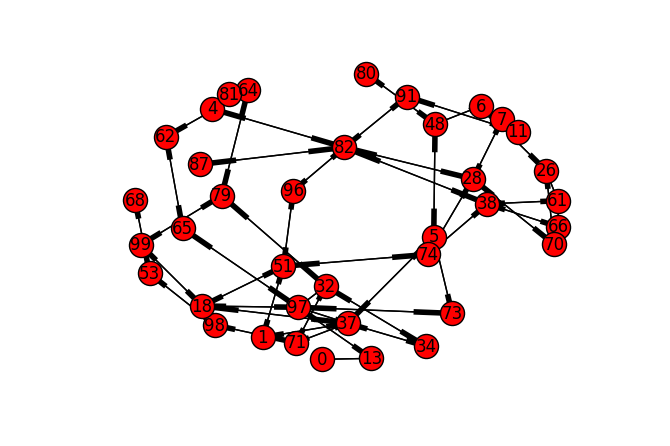

In [113]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

In [114]:
pardaught

{0: [42, 13],
 1: [23],
 4: [31, 81],
 5: [48],
 6: [7, 26, 15],
 7: [],
 11: [],
 13: [16, 67, 20, 21, 97, 72, 9, 14],
 18: [99, 22, 56, 69, 51],
 26: [],
 28: [70],
 32: [34, 71, 57, 27, 79],
 34: [90, 78],
 37: [1, 83, 5, 54],
 38: [35, 12, 10, 76, 66, 61],
 48: [80, 6, 29],
 51: [96, 2, 74],
 53: [68],
 61: [],
 62: [50, 3],
 64: [45, 86],
 65: [62, 55],
 66: [],
 68: [8],
 70: [93],
 71: [98, 84, 58, 59],
 73: [41, 30],
 74: [19, 38, 28],
 79: [64, 85],
 80: [52, 39, 24, 95],
 81: [],
 82: [4, 87, 91],
 87: [60],
 91: [11, 49],
 96: [82, 63],
 97: [32, 33, 37, 65, 73, 75, 18, 25, 94],
 98: [17, 53],
 99: [36, 44, 77]}

In [115]:
lst = list()
for key, values in pardaught.items():
    lst.extend(values)
print(lst)

[42, 13, 62, 55, 8, 17, 53, 7, 26, 15, 98, 84, 58, 59, 45, 86, 41, 30, 19, 38, 28, 16, 67, 20, 21, 97, 72, 9, 14, 64, 85, 52, 39, 24, 95, 99, 22, 56, 69, 51, 60, 31, 81, 11, 49, 70, 48, 34, 71, 57, 27, 79, 32, 33, 37, 65, 73, 75, 18, 25, 94, 90, 78, 36, 44, 77, 23, 1, 83, 5, 54, 35, 12, 10, 76, 66, 61, 4, 87, 91, 82, 63, 80, 6, 29, 96, 2, 74, 68, 93, 50, 3]


In [116]:
print(len(lst))
myset=set(lst)
print(len(myset))

92
92


In [55]:
#H = G.to_undirected()

In [56]:
#H.edges()

In [57]:
nx.shortest_path(G, 4, 14)

[4, 82, 14]

In [58]:
def path_exists(node1, node2, G):
    visited_nodes = set()
    queue = [node1]
    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
        else:
            queue.remove(node)
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        if len(queue) == 0:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))
            return False

In [59]:
def test_path_exists():
    print(path_exists(18, 5, G))
    print(path_exists(29, 26, G))
    
test_path_exists()

Path exists between nodes 18 and 5
True
Path exists between nodes 29 and 26
True


In [60]:
nx.has_path(G, 29, 26)

True

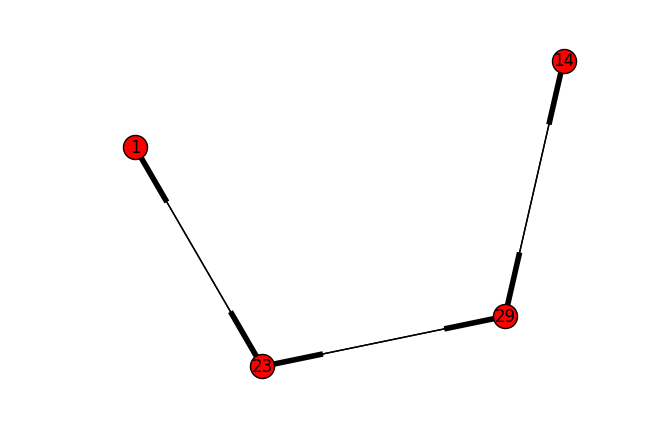

In [61]:
def extract_path_edges(G, source, target):
    if nx.has_path(G, source, target):
        shor = nx.shortest_path(G, source, target)
        newG = G.subgraph(shor)
        return newG

    else:
        raise Exception('Path does not exist between nodes {0} and {1}.'.format(source, target))
        
newG = extract_path_edges(G, 1, 14)
nx.draw(newG, with_labels=True)

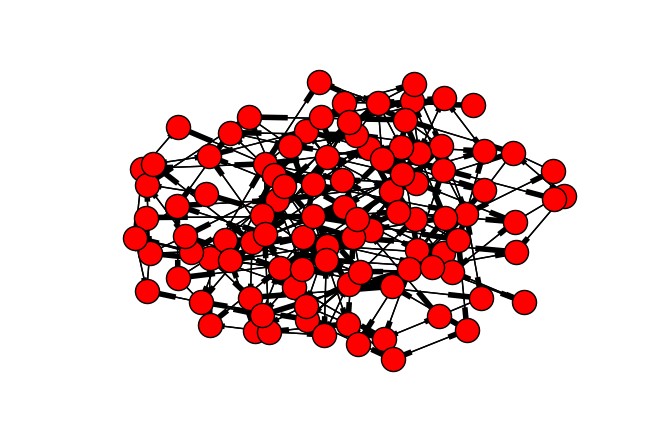

In [62]:
#df[min(df['nviews'])]
nx.draw(G)

In [63]:
df['nviews'].argmin()

38

In [64]:
df.ix[38]

id         SQ_HHV8vdAE
nviews               7
rating               4
nrating              0
eviews               7
Name: 38, dtype: object

In [65]:
#df[['nviews']]

# Let's propagate

### Request from node 97 for video 38

In [67]:
df.ix[38,'nviews'] += 1
df.ix[38,'eviews'] += 1
df.ix[38]

id         SQ_HHV8vdAE
nviews               8
rating               4
nrating              0
eviews               8
Name: 38, dtype: object

In [68]:
G.node[97]['Sharing_Rate']

0.859

In [69]:
ShR_thr = 1
VwR_thr = 4
nodeSt = 97
pardaught = dict()
exclu = list()
connected = set()
queue = [nodeSt]
visited_nodes = set()
path = set()
connected.add(nodeSt)
for node in queue:
    if node == nodeSt:
        df.ix[38,'nviews'] += 1
        df.ix[38,'eviews'] += 1
        print(G.node[node])
        neighbors = G.neighbors(node)
        exclu = [n for n in neighbors if n not in visited_nodes]
        pardaught[node] = exclu
        connected |= set(exclu)
        #queue.remove(node)
        visited_nodes.add(node)
        path.add(node)
        queue.extend(exclu)
        df.ix[38,'eviews'] += len(neighbors)        
    else:
        for key, values in pardaught.items():
            if node in values:
                parent = key
        if VwR_thr <= (df.ix[38,'rating']*G.node[node]['ViRt']*G.node[parent][''Attractiveness_Coeff']):
            df.ix[38,'nviews'] += 1
            df.ix[38,'eviews'] += 1
        if ShR_thr <= (df.ix[38,'rating']*G.node[node]['Sharing_Rate']*G.node[parent][''Attractiveness_Coeff']):
            print(G.node[node])
            neighbors = G.neighbors(node)
            #queue.remove(node)
            visited_nodes.add(node)
            path.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
            df.ix[38,'eviews'] += len(neighbors)

{'Sharing_Rate': 0.859, 'friends': 12, 'Attractiveness_Coeff': 0.814, 'uploads': 42, 'ViRt': 0.24}
{'Sharing_Rate': 0.668, 'friends': 9, 'Attractiveness_Coeff': 0.725, 'uploads': 27, 'ViRt': 0.006}
{'Sharing_Rate': 0.99, 'friends': 4, 'Attractiveness_Coeff': 0.207, 'uploads': 0, 'ViRt': 0.512}
{'Sharing_Rate': 0.973, 'friends': 9, 'Attractiveness_Coeff': 0.503, 'uploads': 4, 'ViRt': 0.589}
{'Sharing_Rate': 0.632, 'friends': 8, 'Attractiveness_Coeff': 0.812, 'uploads': 60, 'ViRt': 0.739}
{'Sharing_Rate': 0.395, 'friends': 4, 'Attractiveness_Coeff': 0.207, 'uploads': 0, 'ViRt': 0.635}
{'Sharing_Rate': 0.922, 'friends': 5, 'Attractiveness_Coeff': 0.799, 'uploads': 82, 'ViRt': 0.253}
{'Sharing_Rate': 0.57, 'friends': 4, 'Attractiveness_Coeff': 0.708, 'uploads': 48, 'ViRt': 0.513}
{'Sharing_Rate': 0.907, 'friends': 7, 'Attractiveness_Coeff': 0.851, 'uploads': 92, 'ViRt': 0.257}
{'Sharing_Rate': 0.321, 'friends': 5, 'Attractiveness_Coeff': 0.779, 'uploads': 70, 'ViRt': 0.426}
{'Sharing_Rate'

In [70]:
df.ix[38]

id         SQ_HHV8vdAE
nviews               8
rating               4
nrating              0
eviews             598
Name: 38, dtype: object

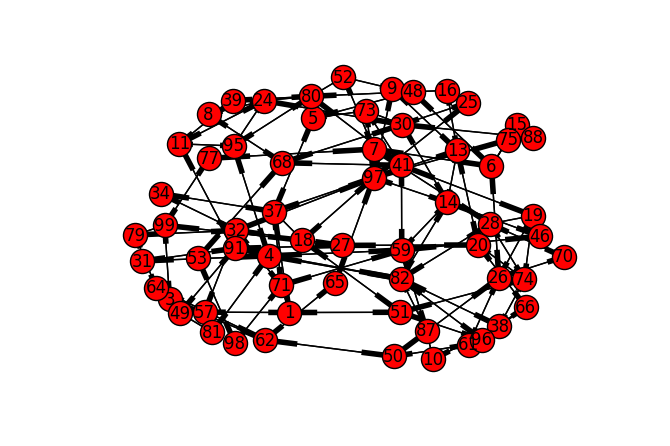

In [71]:
newG = G.subgraph(path)
nx.draw(newG, with_labels=True)

In [72]:
len(path)

63

### 100 requests with random recommendations

In [73]:
random.seed(5002)
for i in range(100):
    nodeSt = randint(0,99)
    queue = [nodeSt]
    visited_nodes = set()
    vid = randint(0,49)
    #print(vid)
    #path = set()
    for node in queue:
        if VwR_thr <= (df.ix[vid,'rating']*G.node[node]['ViRt']):
            df.ix[vid,'nviews'] += 1
            df.ix[vid,'eviews'] += 1
        if ShR_thr <= (df.ix[vid,'rating']*G.node[node]['Sharing_Rate']):
            #print(G.node[node])
            neighbors = G.neighbors(node)
            #queue.remove(node)
            visited_nodes.add(node)
            #path.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
            df.ix[vid,'eviews'] += len(neighbors)

In [74]:
df.head(10)

,id,nviews,rating,nrating,eviews
0,jfACnjzXc3o,565,2.92,13,1121
1,uWAxLCkpPW4,2174,4.67,49,3285
2,zzAFEtwIoAw,936,2.13,39,936
3,3iguSOqYAVg,447,5.00,1,447
4,sA2kG2p9INU,80,1.00,1,80
5,MZX0VXLq54w,2755,4.00,27,4833
6,PawWL2Hml4I,168,5.00,4,168
7,7qM-_ez_5kY,158,4.00,0,158
8,0Ci_GcBeJpU,171,5.00,2,1440
9,Wpgeu_dy8zw,1914,2.33,6,1914


In [75]:
df.tail()

,id,nviews,rating,nrating,eviews
45,saSNRofAFVE,8940,3.67,49,8940
46,s8wt91rs550,79,4.00,0,681
47,5kC4F86fejc,1047,1.33,6,1047
48,ywUYymEQALo,441,5.00,1,1768
49,5uc9WMwzaiY,1789,4.92,13,2338


In [76]:
pdf = rdf = df

In [77]:
pdf.head()

,id,nviews,rating,nrating,eviews
0,jfACnjzXc3o,565,2.92,13,1121
1,uWAxLCkpPW4,2174,4.67,49,3285
2,zzAFEtwIoAw,936,2.13,39,936
3,3iguSOqYAVg,447,5.00,1,447
4,sA2kG2p9INU,80,1.00,1,80


In [78]:
pdf['Expectation'] = pdf['eviews'] - pdf['nviews']

In [79]:
pdf.head(10)

,id,nviews,rating,nrating,eviews,Expectation
0,jfACnjzXc3o,565,2.92,13,1121,556
1,uWAxLCkpPW4,2174,4.67,49,3285,1111
2,zzAFEtwIoAw,936,2.13,39,936,0
3,3iguSOqYAVg,447,5.00,1,447,0
4,sA2kG2p9INU,80,1.00,1,80,0
5,MZX0VXLq54w,2755,4.00,27,4833,2078
6,PawWL2Hml4I,168,5.00,4,168,0
7,7qM-_ez_5kY,158,4.00,0,158,0
8,0Ci_GcBeJpU,171,5.00,2,1440,1269
9,Wpgeu_dy8zw,1914,2.33,6,1914,0


In [80]:
expSum = pdf['Expectation'].sum()
print(expSum)

30547


In [81]:
pdf['Probability'] = pdf['Expectation']/float(expSum)
pdf.head(10)

,id,nviews,rating,nrating,eviews,Expectation,Probability
0,jfACnjzXc3o,565,2.92,13,1121,556,0.018201
1,uWAxLCkpPW4,2174,4.67,49,3285,1111,0.036370
2,zzAFEtwIoAw,936,2.13,39,936,0,0.000000
3,3iguSOqYAVg,447,5.00,1,447,0,0.000000
4,sA2kG2p9INU,80,1.00,1,80,0,0.000000
5,MZX0VXLq54w,2755,4.00,27,4833,2078,0.068026
6,PawWL2Hml4I,168,5.00,4,168,0,0.000000
7,7qM-_ez_5kY,158,4.00,0,158,0,0.000000
8,0Ci_GcBeJpU,171,5.00,2,1440,1269,0.041543
9,Wpgeu_dy8zw,1914,2.33,6,1914,0,0.000000
